# [Машинное обучение на ФБМФ](https://thetahat.ru/courses/bm-2025-spr)
## Домашнее задание 2

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов
-----

In [131]:
# Bot check

# HW_ID: bt_ml_hw2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GroupShuffleSplit

import warnings
import seaborn as sns
sns.set_theme(palette='Set2')
warnings.filterwarnings("ignore")

#### <b><font color="blue">Легкая часть</font></b>

### Задача 1


#### 1. Загрузка данных и предобработка

Загрузите [данные](https://miptstats.github.io/courses/ad_mipt.html) по предсказанию рака груди. Поодробнее о них можно почитать в [источнике](https://www.kaggle.com/datasets/marshuu/breast-cancer).


In [136]:
data = pd.read_csv('breast_cancer.csv')
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Проверьте, имеются ли в ваших данных пропуски. Если да, то удалите их.


In [139]:
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `Bare Nuclei` для разных классов:

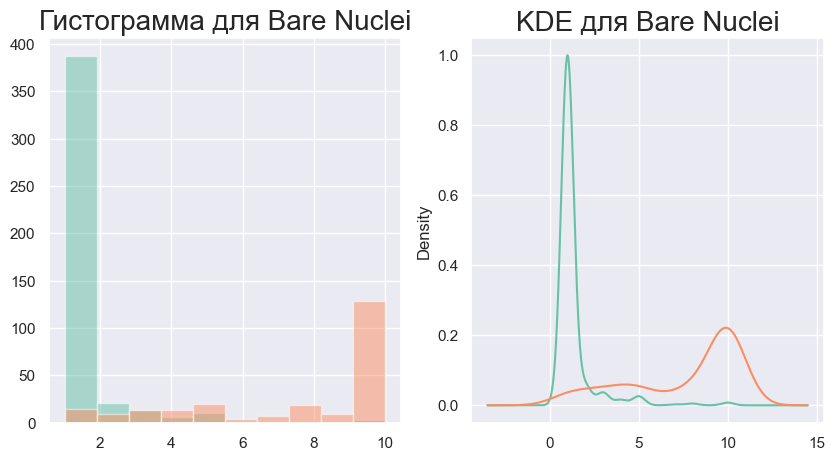

In [142]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.groupby("Class")['Bare Nuclei'].hist(ax=axs[0], alpha=0.5)
data.groupby("Class")['Bare Nuclei'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для Bare Nuclei', fontsize=20)
axs[1].set_title('KDE для Bare Nuclei', fontsize=20);

Чем отличаются способы построения ЯОП и гистограммы? Какую информацию о наших данных можно извлечь из каждого графика?

**Ответ:**
Для построения ядерной оценки плотности для каждого наблюдения строится "ядро" (например, гауссово ядро).Дальше эти ядра суммируются и получается непрерывная кривая, которая аппроксимирует плотность распределения. 

А гистограмма дискретно разбивает наши наблюдения по корзинам (bins). И по оси ординат у нас количество наблюдений в каждом интервале.


Постройте гистограммы и ядерные оценки плотности для всех признаков из датасета отдельно для каждого класса. `Class` — целевая переменная. Можно это сделать, опираясь на код выше, а можно воспользоваться параметром `hue` у функции [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) или другим методом, который вам нравится. Не забывайте подписывать, к чему относится каждый график.

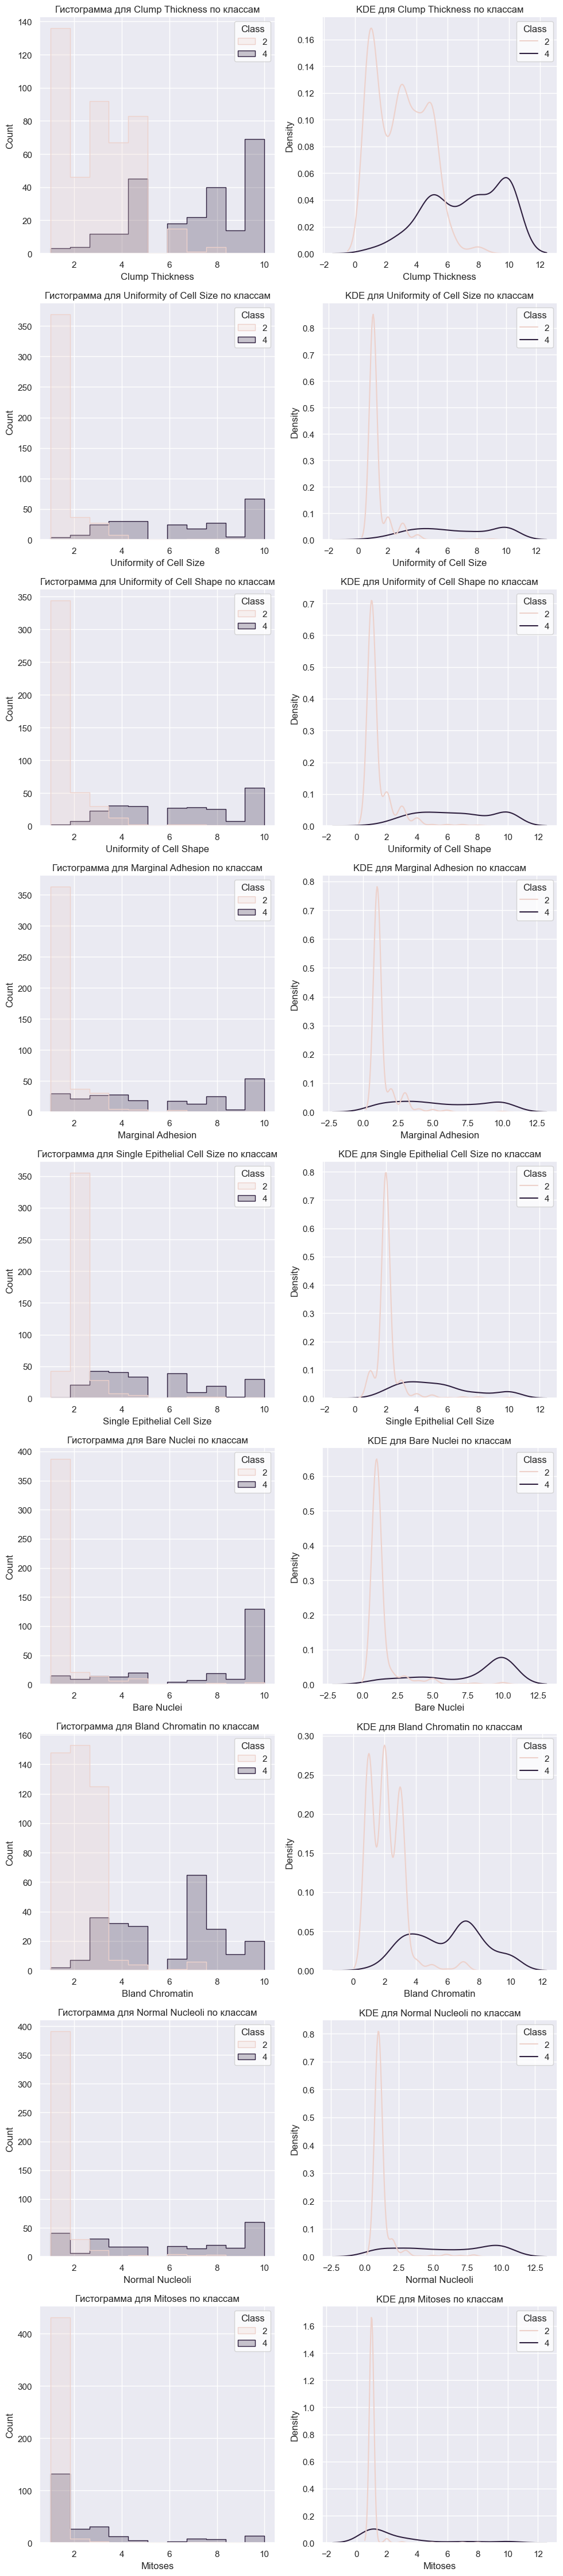

In [147]:
features = [column for column in data.columns if column != 'Class']

fig, axes = plt.subplots(len(features), 2, figsize=(10, 5 * len(features)))
sns.set_theme(style="whitegrid", palette="Set2")
for i, feature in enumerate(features):
    sns.histplot(data=data, x=feature, hue='Class', ax=axes[i][0], element="step", bins =11)
    sns.kdeplot(data=data, x=feature, hue='Class', ax=axes[i][1])
    axes[i][1].set_title(f'KDE для {feature} по классам')
    axes[i][0].set_title(f'Гистограмма для {feature} по классам')
plt.tight_layout()
plt.show()

In [149]:
print(data['Class'].value_counts())

Class
2    444
4    239
Name: count, dtype: int64


Какие выводы вы можете сделать из полученных графиков?

**Вывод:** Для второго класса почти по каждому параметру есть характерное значение и лишь изредко встерчаются наблюдения с иными значениями. Для 4 класса распределение более размазанное - нет исключительных пиков, встречаются различные значения среди наблюдений. Но по признакам Bare Nuclei, Clump Thickness можно попробовать различить эти классы, однако перекрытие всё ещё велико.

Но все эти размышления могут быть и своершенно неверными, так как классы сильно различаются по колличетству наблюдений, что показано выше.

**Это не конец задачи! Переходите к пункту 2!**

#### 2. Обучение модели

Продолжайте использовать выбранные вами данные.

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.


In [156]:
X = data.drop('Class', axis = 1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

Обучите модель логистической регрессии.

In [159]:
model = LogisticRegression(penalty = None, fit_intercept = True, max_iter = 2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, penalty=None)

Сделайте предсказание для тестовой выборки и оцените качество модели.

In [162]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9560975609756097


Можно ли порадоваться таким результатам? Вернемся к гистограммам и сделаем вывод, почему метрики оказались такими большими. 

**Ответ:** Использовали метрику accuracy и она оказалась близка к единице. Казалось бы, отличный результат... Но на самом деле это случилось из-за отличия в размерах классов и как следствие к неравномерному разделению по выборкам.

#### 3. Учтём дисбаланс классов
Давайте посмотрим на распределение наших данных по целевой переменной по всему датасету, тренировочной и тестовой выборкам:

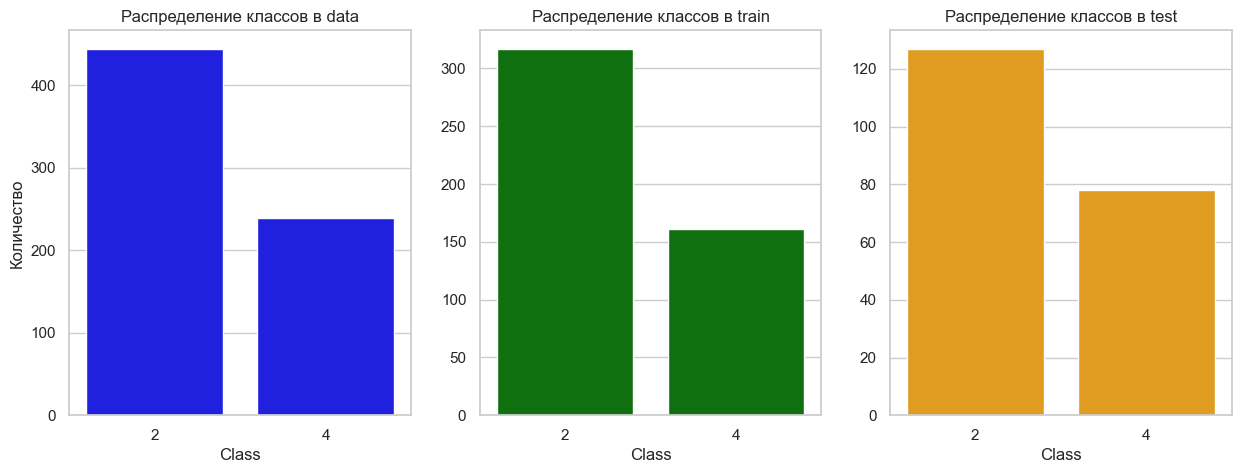

In [167]:
original = y.value_counts() # Колонка таргета из всего датасета
train = y_train.value_counts() # Колонка таргета из тренировочной выборки
test = y_test.value_counts() # Колонка таргета из тестовой выборки

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x=original.index, y=original.values, ax=axes[0], palette=['blue'])
axes[0].set_title('Распределение классов в data')
axes[0].set_ylabel('Количество')

sns.barplot(x=train.index, y=train.values, ax=axes[1], palette=['green'])
axes[1].set_title('Распределение классов в train')

sns.barplot(x=test.index, y=test.values, ax=axes[2], palette=['orange'])
axes[2].set_title('Распределение классов в test');

Видно, что в данных есть сильный перекос — классы представлены неравномерно. Как и почему это повлияло на наши результаты?

**Ответ:** Наша модель в таком случае в большей степени будет обучаться на 2 классе, то есть он будет вносить больший вклад в подсчёт функции потерь, а менее представленный класс будет учитываться меньше.

Есть много способов борьбы с этим. Можно искусственно сгенерировать данные нужного класса или урезать другой класс. Однако сегодня мы воспользуемся ***взвешенной*** логистической регрессией. Суть метода заключается в том, чтобы вручную поставить веса для классов, исходя из их предполагаемой природы: важность разных классов, цена ошибки в реальной жизни (например, что хуже: предсказать наличие рака, если он есть или нет?) и представленность данных.

Функция потерь &mdash; в нашем случае логарифм функции правдоводобия, взятый со знаком минус &mdash; для взвешенной логистической регрессии будет записана как:

$$
L(y, \widehat{y}) = -\sum_{i=1}^{N} w_{y_i} \cdot \left[ y_i \cdot \log(\sigma(\widehat{y}_i)) + (1 - y_i) \cdot \log(1 - \sigma(\widehat{y}_i)) \right]
$$
где:

- $ y_i $ - истинный класс для образца  $i$;
- $ \widehat{y}_i $ - предсказанный класс для образца $i$;
- $ w_{y_i} $ - вес класса;
- знак минус служит для сведения задачи к поиску минимума; задача минимизации несколько более типична для машинного обучения.



Давайте реализуем этот метод. Допишите код, в качестве весов класса  поставьте соотношение их представленности. Выведите подсчет количества экземпляров каждого класса и посчитайте их соотношение.

In [172]:
threshold = ((data['Class'] == 2).sum()/(data['Class'].notnull().sum()))
class_weights = {4: threshold, 2: 1 - threshold}
# если использовать class_weights = 'balanced', модель сама подсчитает веса


In [174]:
weighted_model = LogisticRegression(class_weight=class_weights)
weighted_model.fit(X_train, y_train)

LogisticRegression(class_weight={2: 0.34992679355783307, 4: 0.6500732064421669})

Посчитайте `Accuracy` двумя способами: без учёта и [с учётом весов](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html).

In [177]:
from sklearn.metrics import balanced_accuracy_score
y_pred_weight = weighted_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_weight)
weighted_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"accuracy = {accuracy}")
print(f"balanced accuracy = {weighted_accuracy}")

accuracy = 0.9609756097560975
balanced accuracy = 0.9472541893801736


Как изменилось качество нашей модели? Почему надо учитывать несбалансированность данных?

Сделайте общий вывод по задаче.

**Вывод:** Видим, что результаты почти не изменились. Наверное, нам повезло и хоть классы были представлены по-разному, они всё-равно были сбалансированы. Но в будущем всегда стоит учитывать такую возможность и проверять на сбалансированность (почему было описано выше).